In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration Summary

we have a dataframe consisting of 9827 rows and columns.

our dataset looks bit tidy with no duplicated values.

Release Date column needs to be casted into date time and to extract only the year value.

Overview, Original Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.

there is noticable outliers in Popularity column

Vote Average bettter be categorised for proper analysis.

Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration Summary

In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [9]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [10]:
df['Release_Date'] = df['Release_Date'].dt.year

In [11]:
df['Release_Date'].dtypes

dtype('int32')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping the columns

In [13]:
drop_col = ['Overview', 'Original_Language', 'Poster_Url']

In [14]:
df = df.drop(drop_col, axis=1)

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


categorizing Vote_Average column

We would cut the Vote_Average values and make 3 categories: good, average, bad to describe it more using categorize function provided above.

In [16]:
def categorize(vote_average):
    if vote_average > 7:
        return 'good'
    elif vote_average > 4:
        return 'average'
    else:
        return 'bad'

In [17]:
df['Vote_Average'] = df['Vote_Average'].apply(categorize)

In [18]:
df['Vote_Average'].value_counts()

Vote_Average
average    6782
good       2840
bad         205
Name: count, dtype: int64

In [19]:
df['Genre']

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [22]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,good,Science Fiction
3,2022,The Batman,3827.658,1151,good,Crime
4,2022,The Batman,3827.658,1151,good,Mystery


In [24]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')

# Data Visualization

In [25]:
sns.set_style('whitegrid')

What is the most frequent genre of movies released on Netflix?

In [26]:
df['Genre'].value_counts()


Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

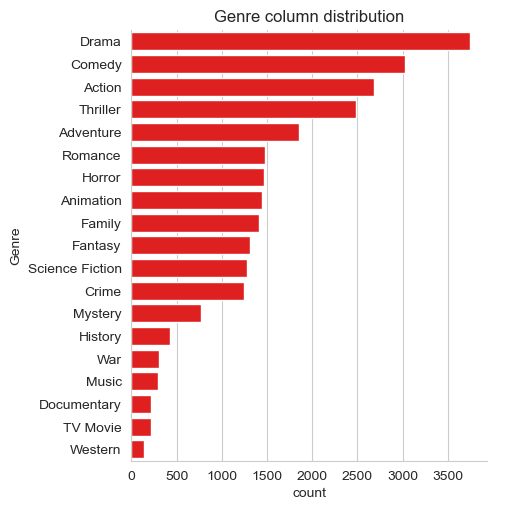

In [27]:
sns.catplot(y='Genre', data = df, kind='count', order= df['Genre'].value_counts().index, color='red')
plt.title('Genre column distribution')
plt.show()

Which has highest votes in vote avg column?


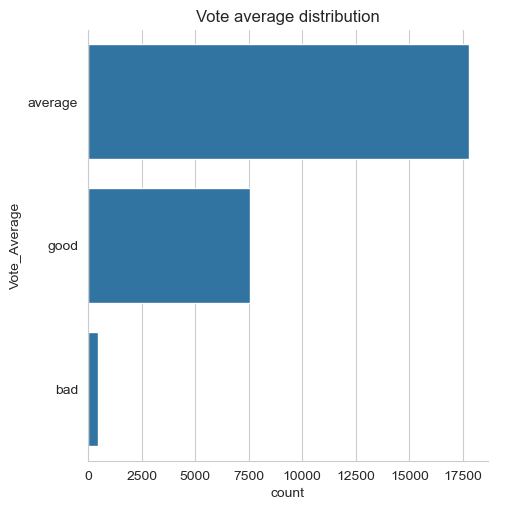

In [28]:
sns.catplot(y='Vote_Average', data = df, kind='count', order = df['Vote_Average'].value_counts().index)
plt.title('Vote average distribution')
plt.show()

What movie got the highest popularity? what's its genre?


In [29]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,good,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,good,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,good,Science Fiction


What movie got the lowest popularity? what's its genre?


In [30]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,good,War
25791,1984,Threads,13.354,186,good,Drama
25792,1984,Threads,13.354,186,good,Science Fiction


# Which year has the most filmmed movies?


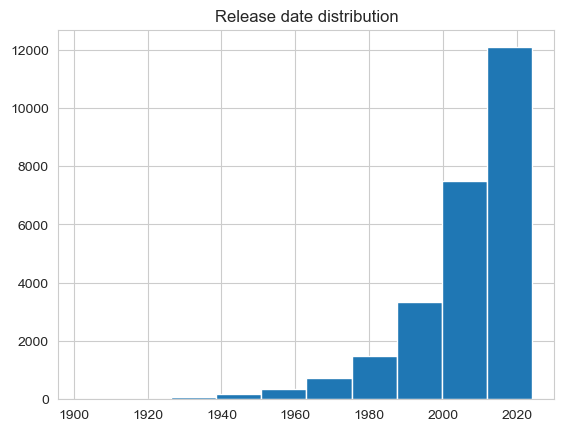

In [31]:
df['Release_Date'].hist()
plt.title('Release date distribution')
plt.show()

Conclusion

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset.

Q2: What genres has highest votes?

Average type mmovie getss the higest votes.

Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

Q3: What movie got the lowest popularity? what's its genre?

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history".

Q4: Which year has the most filmmed movies?5

year 2020 has the highest filmming rate in our dataset.